# Motor Insurance Case Study

The purpose of this notebook is to apply the CRISPDM steps of data understanding and data preparation, using 
the data from the Motor Insurance Case Study. We do this by preparing the **Data Quality Report** and the **Data Quality Plan** for the given dataset. For a description of the business problem and analytics solution, as well as details about the problem domain and features, please consult the FMLPDA textbook.

1. ## Data Understanding: Data Quality Report (Lab 3)
The data quality report uses tables and visualisations to explore the data.
For each feature in the dataframe, we prepare summary tables (with descriptive stats) and plots.

    Stats Tables: One table for continuous features and one table for categorical features. We need to have an understanding of what the features mean, to be able to decide an initial grouping of features into continuous and categorical. Please consult the FMLPDA textbook to get an understanding of the feature meaning.

    Plots: For continuous features, we prepare histograms and box plots. For categorical features, we prepare bar plots. Lab3 and Lab 4 show example steps and code for how to do this.

    The Data Quality Report helps us identify potential problems or errors in the data. It serves as a summary of our findings from the dataset.

2. ## Data Understanding: Data Quality Plan (Lab 4)
The data quality plan lists each feature and a set of strategies to handle potential problems in the data.
We aim to find potential data quality problems and to prepare a table (a plan) which lists the problem found for each feature and potential solutions for fixing the problem. We also list the actions we are going to take for each feature, e.g., leave as is, remove extreme outliers, replace missing data, drop feature if too many missing values, etc. If there is no issue with the feature, we also state this, eg no issues, keep as is.

## Data Quality Report: Tables


In [1]:
# From your virtul environment, install the pandas package for working with data frames: 
# pip install pandas
# pandas is an open source Python library for data analysis
# A data frame allows us to read and access data stored in spreadsheet (.csv) format
# Good tutorial on pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
# Pandas Cookbook: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
# Another good resource for pandas: http://chrisalbon.com/python/pandas_dataframe_importing_csv.htm

#Import the required packages
#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

In [2]:
# Reading from a csv file, into a data frame
# If the csv file has any special symbols, it helps to specify the file encoding.
# Once we read the file with pandas.read_csv() we can write the file to_csv() which will save it by default with a utf-8 encoding.
# More about file encodings and pandas here: https://towardsdatascience.com/all-the-pandas-read-csv-you-should-know-to-speed-up-your-data-analysis-1e16fe1039f3
# https://docs.python.org/3/howto/unicode.html
df = pd.read_csv('MotorInsuranceFraudClaimABTFull.csv', keep_default_na=True, delimiter=',', skipinitialspace=True, encoding='Windows-1252')

#write to file using default utf-8 encoding, this will avoid further issues with the encoding
df.to_csv("MotorInsuranceFraudClaimABTFull-utf8.csv", index=False)

# Show the first few rows in the data frame
df.head(3)

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0


In [3]:
# Check how many rows and columns this dataframe has
df.shape

(500, 14)

In [4]:
#How many rows/instances?
df.shape[0]

500

In [5]:
#How many columns/features?
df.shape[1]

14

In [6]:
# Show the data types in each column as assigned by default by pandas when reading the csv file.
# int64 and float64 are numeric columns.
# The pandas type 'object' stands for Python strings
# Columns mixing numbers and characters are automatically converted to type 'object'.
# Some of the type 'object' columns may be more appropriate as continuous or as categorical types.
# We first explore the data, then decide which columns should be treated as 'continuous' and which 
# should be treated as 'categorical'.
# You can see below that some columns are wrongly set to continuous types, e.g., ID.
df.dtypes

ID                           int64
Insurance Type              object
Income of Policy Holder      int64
Marital Status              object
Num Claimants                int64
Injury Type                 object
Overnight Hospital Stay     object
Claim Amount                 int64
Total Claimed                int64
Num Claims                   int64
Num Soft Tissue            float64
% Soft Tissue              float64
Claim Amount Received        int64
Fraud Flag                   int64
dtype: object

In [7]:
# Descriptive stats for continuous features
# df.describe() by default only prints stats for the numeric columns int64 and float64.
# Often we need to change the feature data type so it more appropriately reflects whether this is 
# a continuous or a categorical feature.
pd.set_option("display.precision", 3)
df.describe()

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.000,500.000,500.000,500.000,500.000,500.000,490.000,500.000,500.000,500.000
mean,250.500,13739.994,1.908,16373.204,9597.186,0.798,0.235,0.172,13051.942,0.336
std,144.482,20081.535,1.013,29426.277,35655.686,2.667,0.590,0.428,30547.195,0.473
min,1.000,0.000,1.000,-99999.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,125.750,0.000,1.000,3322.250,0.000,0.000,0.000,0.000,0.000,0.000
50%,250.500,0.000,2.000,5663.000,0.000,0.000,0.000,0.000,3253.500,0.000
75%,375.250,33918.500,3.000,12245.500,11282.750,1.000,0.000,0.000,8191.750,1.000
max,500.000,71284.000,4.000,270200.000,729792.000,56.000,5.000,2.000,295303.000,1.000


In [8]:
# Transpose/rotate the previous table so it looks like the table in the lecture and textbook
# One feature per row, stats in the columns
# The 'count' column shows how many rows have data for that feature.
# We can see that Num Soft Tissue only has 490 rows defined (out of 500 rows total), so 10 rows are 
# missing this value.
# This table does not show the cardinality and the %Missing columns.
# We compute them below.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,500.0,250.500,144.482,1.0,125.75,250.5,375.25,500.0
Income of Policy Holder,500.0,13739.994,20081.535,0.0,0.00,0.0,33918.50,71284.0
Num Claimants,500.0,1.908,1.013,1.0,1.00,2.0,3.00,4.0
Claim Amount,500.0,16373.204,29426.277,-99999.0,3322.25,5663.0,12245.50,270200.0
Total Claimed,500.0,9597.186,35655.686,0.0,0.00,0.0,11282.75,729792.0
Num Claims,500.0,0.798,2.667,0.0,0.00,0.0,1.00,56.0
Num Soft Tissue,490.0,0.235,0.590,0.0,0.00,0.0,0.00,5.0
% Soft Tissue,500.0,0.172,0.428,0.0,0.00,0.0,0.00,2.0
Claim Amount Received,500.0,13051.942,30547.195,0.0,0.00,3253.5,8191.75,295303.0
Fraud Flag,500.0,0.336,0.473,0.0,0.00,0.0,1.00,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       500 non-null    int64  
 1   Insurance Type           500 non-null    object 
 2   Income of Policy Holder  500 non-null    int64  
 3   Marital Status           170 non-null    object 
 4   Num Claimants            500 non-null    int64  
 5   Injury Type              500 non-null    object 
 6   Overnight Hospital Stay  500 non-null    object 
 7   Claim Amount             500 non-null    int64  
 8   Total Claimed            500 non-null    int64  
 9   Num Claims               500 non-null    int64  
 10  Num Soft Tissue          490 non-null    float64
 11  % Soft Tissue            500 non-null    float64
 12  Claim Amount Received    500 non-null    int64  
 13  Fraud Flag               500 non-null    int64  
dtypes: float64(2), int64(8), o

In [10]:
#Keep only the numeric features.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['ID', 'Income of Policy Holder', 'Num Claimants', 'Claim Amount',
       'Total Claimed', 'Num Claims', 'Num Soft Tissue', '% Soft Tissue',
       'Claim Amount Received', 'Fraud Flag'],
      dtype='object')

In [11]:
# Select only the numeric features
df[numeric_columns]

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,0,2,1625,3250,2,2.0,1.0,0,1
1,2,0,2,15028,60112,1,0.0,0.0,15028,0
2,3,54613,1,-99999,0,0,0.0,0.0,572,0
3,4,0,3,270200,0,0,0.0,0.0,270200,0
4,5,0,4,8869,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
495,496,0,1,2118,0,0,0.0,0.0,0,1
496,497,29280,4,3199,0,0,NaN,0.0,0,1
497,498,0,1,32469,0,0,0.0,0.0,16763,0
498,499,46683,1,179448,0,0,0.0,0.0,179448,0


In [12]:
print("Feature, UniqueValues") 
for column in numeric_columns:
    print(column + "," + str(len(df[column].unique())))

Feature, UniqueValues
ID,500
Income of Policy Holder,171
Num Claimants,4
Claim Amount,493
Total Claimed,235
Num Claims,7
Num Soft Tissue,6
% Soft Tissue,9
Claim Amount Received,329
Fraud Flag,2


In [13]:
# Return the unique values for feature Income
df['Marital Status'].unique()

array([nan, 'Married', 'Single', 'Divorced'], dtype=object)

In [14]:
len(df['Marital Status'].unique())

4

In [15]:
#Missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
# When summing data, NA (missing) values will be treated as zero
# If the data are all NA, the result will be NA
# Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

#Missing data all features
df.isnull().sum()

ID                           0
Insurance Type               0
Income of Policy Holder      0
Marital Status             330
Num Claimants                0
Injury Type                  0
Overnight Hospital Stay      0
Claim Amount                 0
Total Claimed                0
Num Claims                   0
Num Soft Tissue             10
% Soft Tissue                0
Claim Amount Received        0
Fraud Flag                   0
dtype: int64

In [16]:
# Missing values for numeric columns only.
# As we knew already 'Num Soft Tissue' has 10 values missing.
df[numeric_columns].isnull().sum()

ID                          0
Income of Policy Holder     0
Num Claimants               0
Claim Amount                0
Total Claimed               0
Num Claims                  0
Num Soft Tissue            10
% Soft Tissue               0
Claim Amount Received       0
Fraud Flag                  0
dtype: int64

In [17]:
# Turn the feature 'ID' from 'int64' to 'category' type
df['ID'] = df['ID'].astype('category')
# Turn the feature FraudFlag into type 'category'
df['Fraud Flag'] = df['Fraud Flag'].astype('category')
df.dtypes

ID                         category
Insurance Type               object
Income of Policy Holder       int64
Marital Status               object
Num Claimants                 int64
Injury Type                  object
Overnight Hospital Stay      object
Claim Amount                  int64
Total Claimed                 int64
Num Claims                    int64
Num Soft Tissue             float64
% Soft Tissue               float64
Claim Amount Received         int64
Fraud Flag                 category
dtype: object

In [18]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['Insurance Type ', 'Marital Status', 'Injury Type',
       'Overnight Hospital Stay'],
      dtype='object')

In [19]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

ID                         category
Insurance Type             category
Income of Policy Holder       int64
Marital Status             category
Num Claimants                 int64
Injury Type                category
Overnight Hospital Stay    category
Claim Amount                  int64
Total Claimed                 int64
Num Claims                    int64
Num Soft Tissue             float64
% Soft Tissue               float64
Claim Amount Received         int64
Fraud Flag                 category
dtype: object

In [20]:
#Update the numeric features, after converting ID and flag to 'category'.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['Income of Policy Holder', 'Num Claimants', 'Claim Amount',
       'Total Claimed', 'Num Claims', 'Num Soft Tissue', '% Soft Tissue',
       'Claim Amount Received'],
      dtype='object')

In [21]:
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
df[category_columns]

,ID,Insurance Type,Marital Status,Injury Type,Overnight Hospital Stay,Fraud Flag
0,1,CI,NaN,Soft Tissue,No,1
1,2,CI,NaN,Back,Yes,0
2,3,CI,Married,Broken Limb,No,0
3,4,CI,NaN,Serious,Yes,0
4,5,CI,NaN,Soft Tissue,No,1
...,...,...,...,...,...,...
495,496,CI,NaN,Soft Tissue,No,1
496,497,CI,Married,Broken Limb,Yes,1
497,498,CI,NaN,Broken Limb,Yes,0
498,499,CI,Married,Broken Limb,No,0


In [22]:
# Descriptive stats for categorical features only.
df[category_columns].describe().T

,count,unique,top,freq
ID,500,500,500,1
Insurance Type,500,1,CI,500
Marital Status,170,3,Married,99
Injury Type,500,4,Broken Limb,177
Overnight Hospital Stay,500,2,No,354
Fraud Flag,500,2,0,332


In [23]:
# Performing a descriptive statistic
# Shows the mean for each numeric feature
df[numeric_columns].mean()

Income of Policy Holder    13739.994
Num Claimants                  1.908
Claim Amount               16373.204
Total Claimed               9597.186
Num Claims                     0.798
Num Soft Tissue                0.235
% Soft Tissue                  0.172
Claim Amount Received      13051.942
dtype: float64

In [24]:
# Performing a descriptive statistic
# Shows the standard deviation for each numeric feature
df[numeric_columns].std()

Income of Policy Holder    20081.535
Num Claimants                  1.013
Claim Amount               29426.277
Total Claimed              35655.686
Num Claims                     2.667
Num Soft Tissue                0.590
% Soft Tissue                  0.428
Claim Amount Received      30547.195
dtype: float64

# Next we finalise the data quality report and add columns on %missing and cardinality of features.

In [25]:
# Look once again at the summary stats table for numeric features
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Income of Policy Holder,500.0,13739.994,20081.535,0.0,0.00,0.0,33918.50,71284.0
Num Claimants,500.0,1.908,1.013,1.0,1.00,2.0,3.00,4.0
Claim Amount,500.0,16373.204,29426.277,-99999.0,3322.25,5663.0,12245.50,270200.0
Total Claimed,500.0,9597.186,35655.686,0.0,0.00,0.0,11282.75,729792.0
Num Claims,500.0,0.798,2.667,0.0,0.00,0.0,1.00,56.0
Num Soft Tissue,490.0,0.235,0.590,0.0,0.00,0.0,0.00,5.0
% Soft Tissue,500.0,0.172,0.428,0.0,0.00,0.0,0.00,2.0
Claim Amount Received,500.0,13051.942,30547.195,0.0,0.00,3253.5,8191.75,295303.0


In [26]:
# df.count() gives the number of rows with non-NAN feature value
# Instead of df.isnull().sum() we can use the functions df.shape and df.count()
# numeric_columns_missing = df.shape[0] - df[numeric_columns].count()

# Prepare %missing column
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
Income of Policy Holder,0.0
Num Claimants,0.0
Claim Amount,0.0
Total Claimed,0.0
Num Claims,0.0
Num Soft Tissue,2.0
% Soft Tissue,0.0
Claim Amount Received,0.0


In [27]:
# Add cardinality column
# A simpler way to get the number of unique values per feature
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
Income of Policy Holder,171
Num Claimants,4
Claim Amount,493
Total Claimed,235
Num Claims,7
Num Soft Tissue,5
% Soft Tissue,9
Claim Amount Received,329


In [28]:
# Add missing values column
df_table_numeric = df[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("MotorInsurance-DataQualityReport-NumericFeatures-Table.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max,%missing,card
Income of Policy Holder,500.0,13739.994,20081.535,0.0,0.00,0.0,33918.50,71284.0,0.0,171
Num Claimants,500.0,1.908,1.013,1.0,1.00,2.0,3.00,4.0,0.0,4
Claim Amount,500.0,16373.204,29426.277,-99999.0,3322.25,5663.0,12245.50,270200.0,0.0,493
Total Claimed,500.0,9597.186,35655.686,0.0,0.00,0.0,11282.75,729792.0,0.0,235
Num Claims,500.0,0.798,2.667,0.0,0.00,0.0,1.00,56.0,0.0,7
Num Soft Tissue,490.0,0.235,0.590,0.0,0.00,0.0,0.00,5.0,2.0,5
% Soft Tissue,500.0,0.172,0.428,0.0,0.00,0.0,0.00,2.0,0.0,9
Claim Amount Received,500.0,13051.942,30547.195,0.0,0.00,3253.5,8191.75,295303.0,0.0,329


# Same steps for preparing the data quality report table for the categorical features

In [29]:
# Look once again at the summary stats table for categorical features
df[category_columns].describe().T

,count,unique,top,freq
ID,500,500,500,1
Insurance Type,500,1,CI,500
Marital Status,170,3,Married,99
Injury Type,500,4,Broken Limb,177
Overnight Hospital Stay,500,2,No,354
Fraud Flag,500,2,0,332


In [30]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
ID,0.0
Insurance Type,0.0
Marital Status,66.0
Injury Type,0.0
Overnight Hospital Stay,0.0
Fraud Flag,0.0


In [31]:
# Prepare the cardinality column
category_columns_card = df[category_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
ID,500
Insurance Type,1
Marital Status,3
Injury Type,4
Overnight Hospital Stay,2
Fraud Flag,2


In [32]:
# Add missing values column
df_table_categ = df[category_columns].describe().T
df_table_categ

,count,unique,top,freq
ID,500,500,500,1
Insurance Type,500,1,CI,500
Marital Status,170,3,Married,99
Injury Type,500,4,Broken Limb,177
Overnight Hospital Stay,500,2,No,354
Fraud Flag,500,2,0,332


In [33]:
# Put the columns together to prepare the final table for numeric_columns
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_perc_missing, df_category_card], axis=1)

# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.
df_category_columns_data_quality_report_table.to_csv("MotorInsurance-DataQualityReport-CategoryFeatures-Table.csv", 
                                         index_label='Feature')
df_category_columns_data_quality_report_table

,count,unique,top,freq,%missing,card
ID,500,500,500,1,0.0,500
Insurance Type,500,1,CI,500,0.0,1
Marital Status,170,3,Married,99,66.0,3
Injury Type,500,4,Broken Limb,177,0.0,4
Overnight Hospital Stay,500,2,No,354,0.0,2
Fraud Flag,500,2,0,332,0.0,2


## Data Quality Report: Visualisations

In this section we plot histograms and boxplots for numeric features and barplots for categorical features. This is a visual approach to exploring the distribution of values for each feature.

<Axes: >

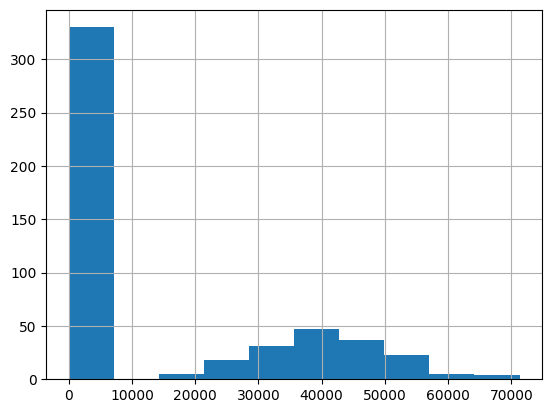

In [34]:
#Plot a histogram of the continuous feature Income
df['Income of Policy Holder'].hist()

<Axes: ylabel='Frequency'>

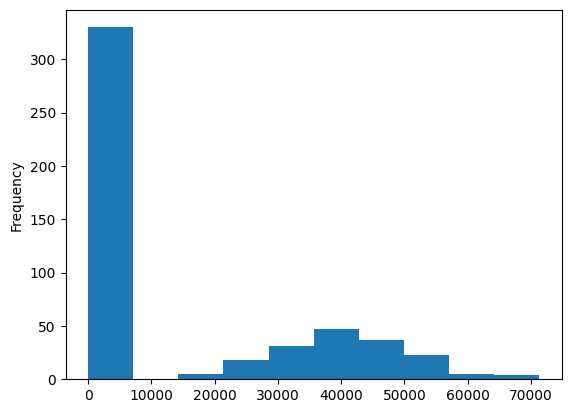

In [35]:
#Another way to plot a histogram
#plt.figure(figsize=(20,10))
df['Income of Policy Holder'].plot(kind='hist')

<Axes: >

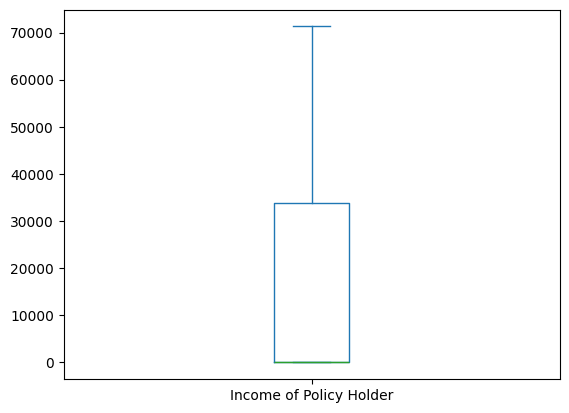

In [36]:
# Plot a boxplot for continuous feature Income
#plt.figure(figsize=(20,10))
df['Income of Policy Holder'].plot(kind='box')

<Axes: xlabel='Marital Status'>

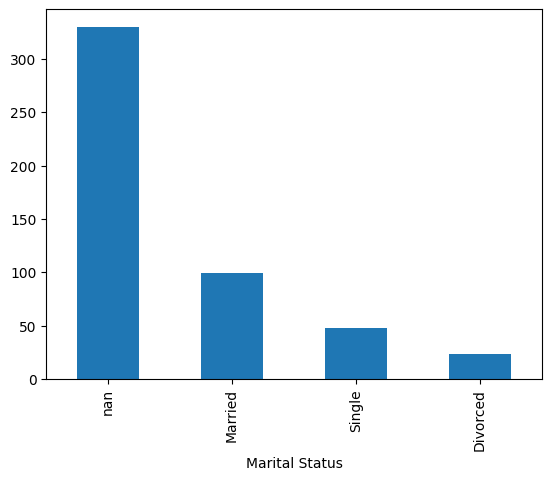

In [37]:
# Plot a barplot for categorical feature 'Marital Status'
df['Marital Status'].value_counts(dropna = False).plot(kind='bar')

<Figure size 640x480 with 0 Axes>

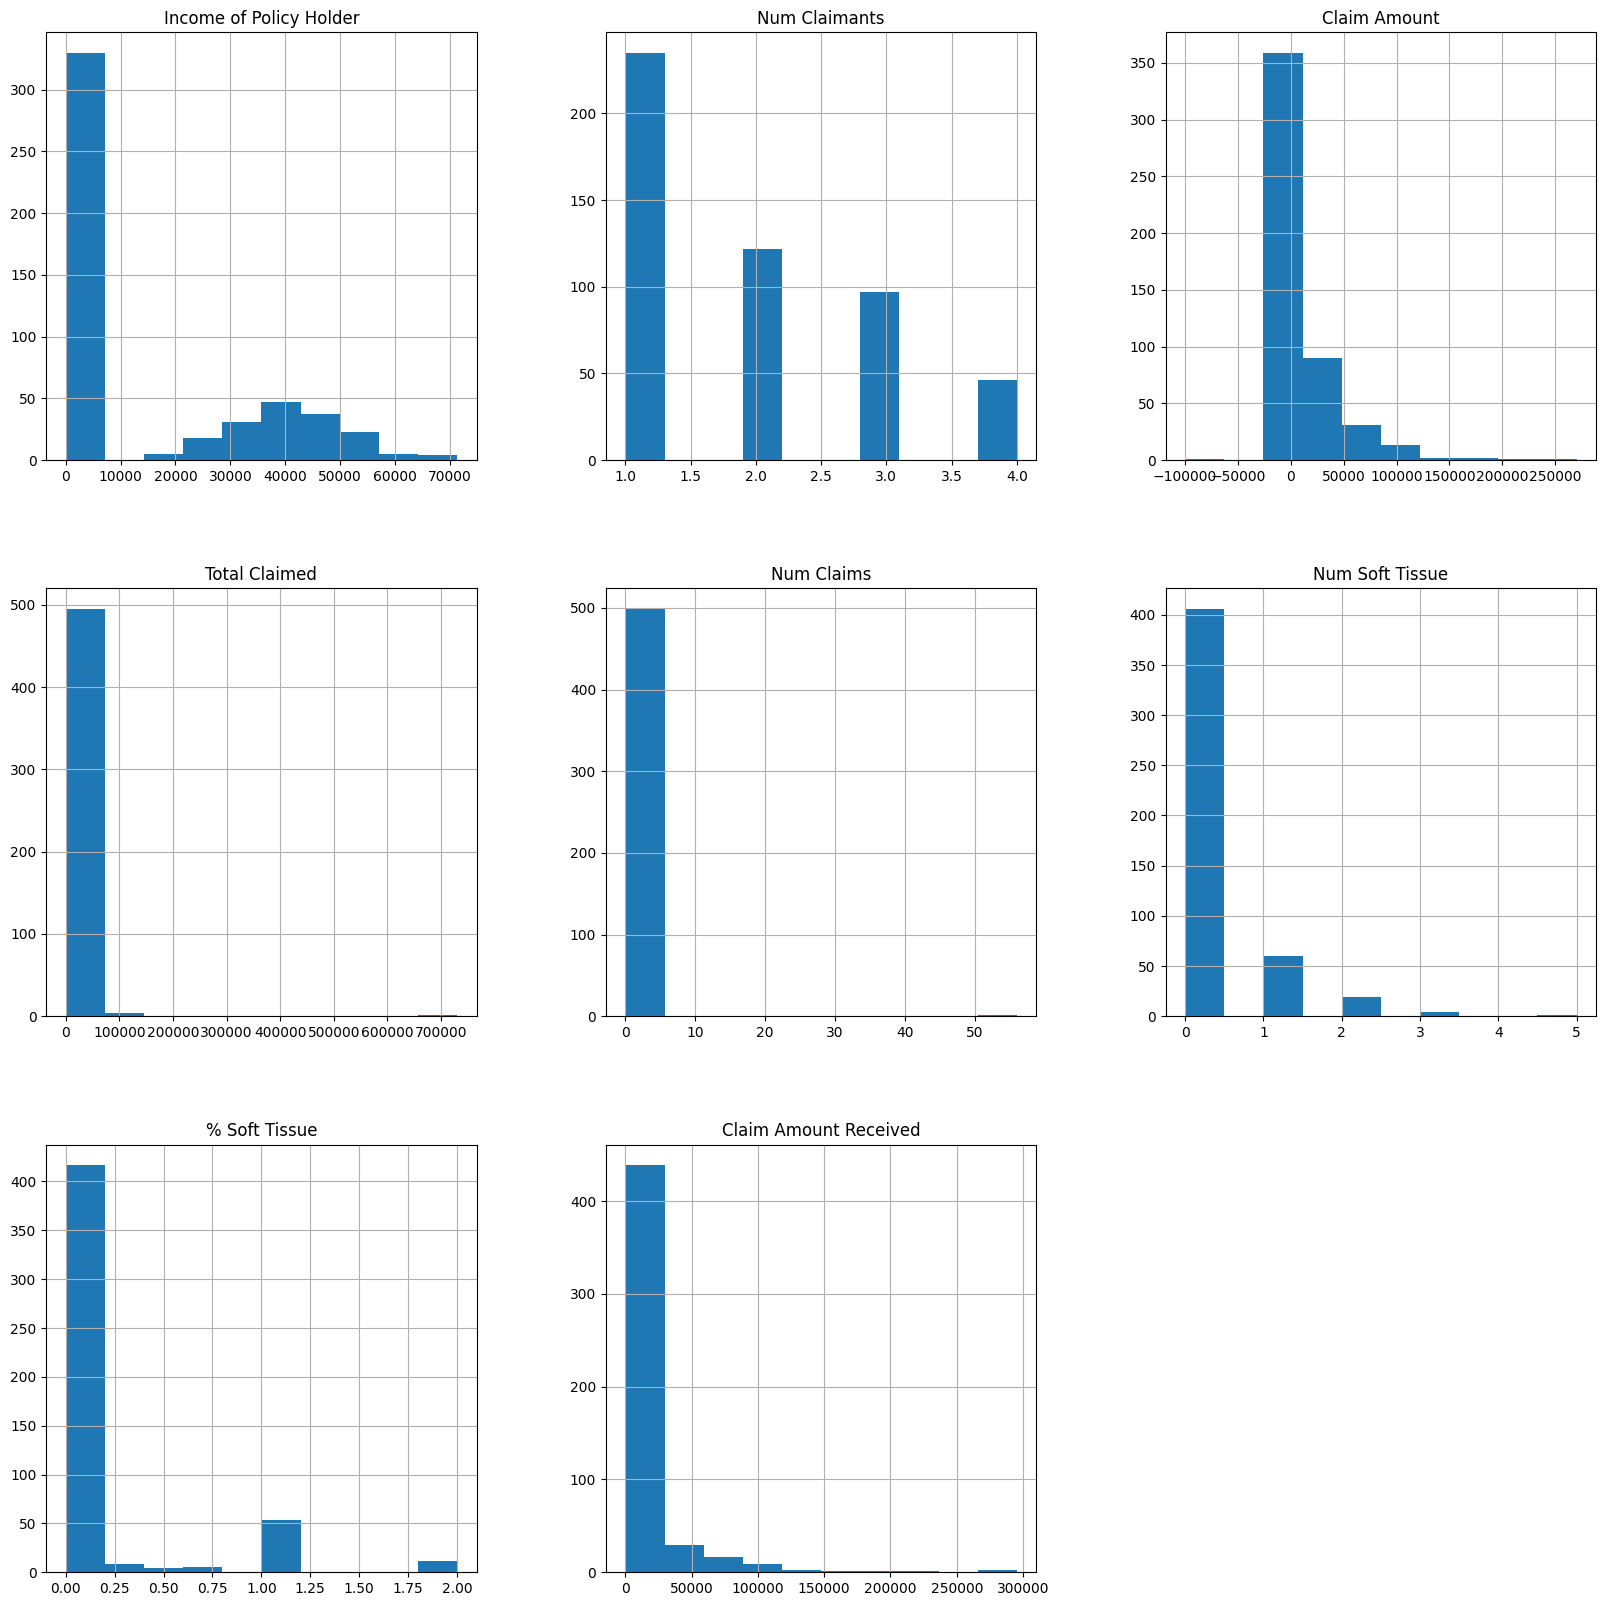

In [38]:
#http://pandas.pydata.org/pandas-docs/stable/visualization.html
# We can plot the histogram of all numeric features at the same time.
plt.figure()
df.hist(figsize=(20, 20))

# We can save the plot into a file as shown below.
plt.savefig('MotorInsurance-DataQualityReport-NumericFeatures-Histograms.png')

## Data Understanding: Data Quality Plan
After having investigated every feature in the dataset, and noting down and discussing issues with each feature, we move to the Data Quality Plan. The plan list each feature and the problem identified, as well as the solution that will be implemented for the feature, in order to address the problem identified.

For example, a potential plan start:

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|Marital Status           | Missing Values (60%)       | Too many missing values. Investigate if missing values can be inferred from other columns. If not, drop feature.              |
|Insurance Type           | Cardinality=1              | Constant feature. Drop feature              |
|Income of Policy Holder  | More than 50% values are 0 | Investigate cause and decide what to do with this feature|
|Claim Amount             | Negative feature value (-99,999.0) | Investigate cause of error and how many rows are affected|



## Exercises

1. **Data Understanding: Data Quality Report.** Design a data quality report for the Motor Insurance data (short 2-3 page report). Please describe your thinking around the issues identified for each feature and the solutions proposed. At the lab you can discuss your report and receive feedback on each feature.
2. **Data Understanding: Data Quality Plan.** Design a data quality plan for the Motor Insurance data.  At the lab you can discuss your plan and receive feedback on each feature.
3. **Implementing Data Quality Strategies.** Update your csv file to include the actions noted in your data quality plan (e.g., drop features, drop rows, handle outliers, fill missing data).
4. **Clean Data.** Save the new data frame to a file with a name that reflects that the data has been cleaned (e.g., motor_isurance_clean_round1.csv).
5. **Data Understanding: Relationships between feature pairs.** Explore relationships between feature pairs by using appropriate plots, as discussed in the lecture and texbook.

Note: We will discuss the Data Quality Report and Data Quality Plan for this dataset in Lab3 and Lab4.
